# 120 godina olimpijskih igara: natjecatelji i rezultati

Ovo je povijesni skup podataka o modernim Olimpijskim igrama, uključujući sve igre od Atene 1896. do Rija 2016. 

Zimske i Ljetne OI igre su se održavale u istoj godini svako 4 godine sve do 1992. Nakon toga su ih rasporedili tako da se nastave održavati u četverogodišnjem ciklusu ali s razmakom od 2 godine.

Datoteka athlete_events.csv sadrži 271116 redaka i 15 stupaca. Svaki redak odgovara pojedinačnom sportašu koji se natječe u pojedinačnom olimpijskom događaju. 

Stupci su:

*   ID - jedinstveni broj za svakog sportaša
*   Name - ime sportaša
*   Sex - M ili Ž
*   Age - broj godina
*   Height - visina u centimetrima
*   Weight - težina u kilogramima
*   Team - ime tima
*   NOC - nacionalni olimpijski odbor
*   Games - godina i sezona
*   Year - godina
*   Season - doba OI (ljeto ili zima)
*   City - grad održavanja OI
*   Sport - sport
*   Event – discplina
*   Medal - medalja (zlatna, srebrna, brončana ili NA)

U ovom projektu smo koristili navedeni skup podataka  za statističku analizu i izvukli zanimljive činjenice o olimpijskim igrama i natjecateljima koji su sudjelovali. Nakon analize i vizualizacije podataka, koristili smo linearnu regresiju za predviđanje određenih vrijednosti.


In [ ]:
%cd /content/drive/MyDrive/ZP/projekt

/content/drive/MyDrive/ZP/projekt


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Priprema podataka

In [ ]:
data = pd.read_csv("athlete_events.csv")

In [ ]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
data.shape

(271116, 15)

In [ ]:
data.drop(["ID","Games"],axis=1,inplace= True)
data.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


U prethodnoj ćeliji upotrijebljena je drop funkcija za uklanjanje određenih stupaca (axis = 1). Stupci koji su uklonjeni su "ID" i "Games". Razlog iz kojeg smo uklonili "ID" stupac je taj što od njega nemamo značajnih informacija, svaki sudionik je identificiran imenom i prezimenom u stupcu "Name". Stupac "Games" je uklonjen jer se njegovi podaci već nalaze u stupcima "Year" i "Season".

**Provjera vrijednosti koje nedostaju**


In [ ]:
list(data.columns[data.isna().any()])

['Age', 'Height', 'Weight', 'Medal']

In [ ]:
na_values = data.isnull().sum()
postotak = data.isnull().sum()/data.shape[0]*100

value = {
    "na_values": na_values,
    "postotak": postotak
}
frame = pd.DataFrame(value)
frame

,na_values,postotak
Name,0,0.000000
Sex,0,0.000000
Age,9474,3.494445
Height,60171,22.193821
Weight,62875,23.191180
Team,0,0.000000
NOC,0,0.000000
Year,0,0.000000
Season,0,0.000000
City,0,0.000000


Iz dobivenog dataframe-a primjećujemo da najviše vrijednosti nedostaje u stupcu "Medal". Razlog tomu je što se neosvojena medalja na natjecanju vodi kao vrijednost koja nedostaje. Ostali stupci u kojima nedostaju vrijednost su: "Age", "Height" i "Weight". Budući da postotak vrijednosti koje nedostaju u ovim stupcima nije velik i ne utječe na analizu i rad s podacima, odlučili smo ostaviti podatke u stanju kakvom jesu.

In [ ]:
data['Medal'].fillna('No medal', inplace = True) 

In [ ]:
data.head(n=3)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal


S obzirom da se neosvojena medalja vodila kao nedostajuća vrijednost, zamijenili smo ih sa vrijednošću "No medal". Stupac "Medal" više nema nepotpunih vrijednosti.

## Analiza podataka

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   271116 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
num_data = data.select_dtypes(include=['int64','float64'])
cat_data = data.select_dtypes(include=['object'])

In [ ]:
print(f"Numeričke varijable: {num_data.columns.values}")
print(f"Kategoričke varijable: {cat_data.columns.values}")

Numeričke varijable: ['Age' 'Height' 'Weight' 'Year']
Kategoričke varijable: ['Name' 'Sex' 'Team' 'NOC' 'Season' 'City' 'Sport' 'Event' 'Medal']


In [ ]:
data.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


Budući da se određeni natjecatelji pojavljuju ili u više disciplina ili u više sezona olimpijskih igara, statističke vrijednosti gore ispisanih numeričkih podataka nisu sasvim točne. U sljedećem koraku ćemo filtrirati jedinstvena imena natjecatelja i izračunati nove statističke vrijednosti.

In [ ]:
data.Name.unique()
print(f"Broj jedinstvenih natjecatelja: {len(data.Name.unique())}")

Broj jedinstvenih natjecatelja: 134732


In [ ]:
# Uklanjanje duplih redaka s obzirom na određene stupce
unique_data = data.drop_duplicates(subset=["Name"], keep='first')

Korištenjem pandas metode drop_duplicates smo uklonili duple retke s obzirom na određene stupce. Parametar "subset" prima niz određenih stupaca, a parametar keep prima vrijednost kojom opisujemo način izbacivanja duplih podataka. Proslijeđenom vrijednošću "first" smo ostavili podatke gdje se ime prvi put pojavljuje.


In [ ]:
unique_data.describe()

,Age,Height,Weight,Year
count,128411.000000,101003.000000,100030.000000,134732.000000
mean,24.452033,176.315644,71.959982,1976.965160
std,5.698609,10.369393,14.559450,30.305088
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,170.000000,62.000000,1960.000000
50%,23.000000,176.000000,70.000000,1984.000000
75%,27.000000,183.000000,80.000000,2000.000000
max,97.000000,226.000000,214.000000,2016.000000


Nakon filtriranja podataka, izvučene su nove statističke vrijednosti. Analizom rezultata možemo vidjeti da se razlikuju od prvotnih izračuna. Novi rezultati su točniji.

*   Srednja dob natjecatelja: 23 godine.
*   Prosječna visina natjecatelja: 176.32 cm.
*   Prosječna težina natjecatelja: 71.96 kg.





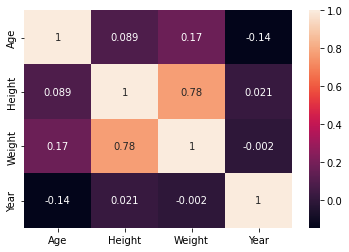

In [ ]:
num_data = unique_data.select_dtypes(include=['int64','float64'])
sns.heatmap(num_data.corr(),annot=True);

Iz matrice korelacije vidimo da je najveća korelacija između varijabli "Weight" i "Height". Budući da je pozitivna korelacija zaključujemo da porastom vrijednosti jedne varijable raste i druga. U matrici nema značajnijih negativnih korelacija.

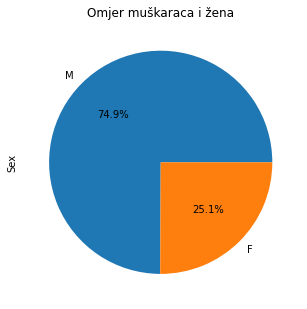

In [ ]:
unique_data['Sex'].value_counts().plot(kind = 'pie', title = 'Omjer muškaraca i žena', figsize = (5,10), layout=(10,2), autopct='%1.1f%%')
plt.show()

In [ ]:
male_data = unique_data[unique_data["Sex"] == "M"]
female_data = unique_data[unique_data["Sex"] == "F"]
print(f"Broj muškaraca: {len(male_data)}")
print(f"Broj žena: {len(female_data)}")

Broj muškaraca: 100953
Broj žena: 33779


U olimpijskim igrama više su sudjelovali muškarci.

In [ ]:
def plotHistogram(df, variable):
  sns.histplot(df[variable], bins = 85)
  plt.title("Data Frequency - {}".format(variable))
  plt.show()

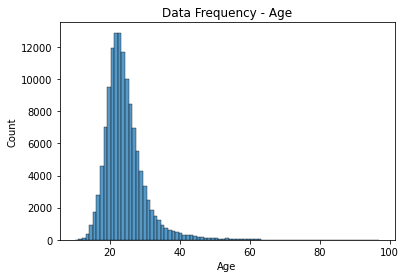

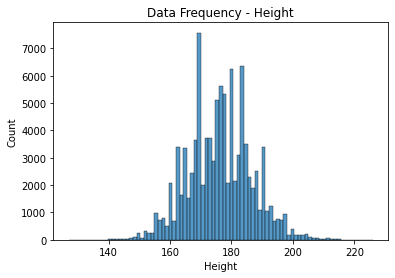

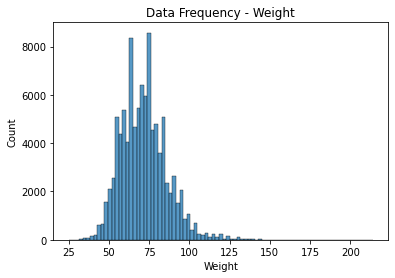

In [ ]:
num_var = ["Age", "Height", "Weight"]
for i in num_var:
  plotHistogram(unique_data, i)

Analogno statističkoj analizi, grafovi su očekivane distribucije. Najviše natjecatelja je bilo dobi između 20 i 30 godina. Najčešće visine natjecatelja su od 175 do 180 cm, a najčešće težine su bile u granici od 60 do 80 kg.


In [ ]:
unique_NOC = data.NOC.unique()
print(f"Broj država koje su sudjelovale na OI: {len(unique_NOC)}")

Broj država koje su sudjelovale na OI: 230


In [ ]:
medalData = data[data.Medal != "No medal"]
medalNOC = medalData.NOC.value_counts()

print(f"Broj država s osvojenim medaljama: {len(medalNOC)}")
print(f"Broj država koje nisu osvojile niti jednu medalju: {len(unique_NOC)- len(medalNOC)}")


Broj država s osvojenim medaljama: 149
Broj država koje nisu osvojile niti jednu medalju: 81


In [ ]:
medalData_ = medalData.drop_duplicates(subset=["Sex", "Team", "NOC", "Year", "Season", "City", "Sport", "Event", "Medal"])

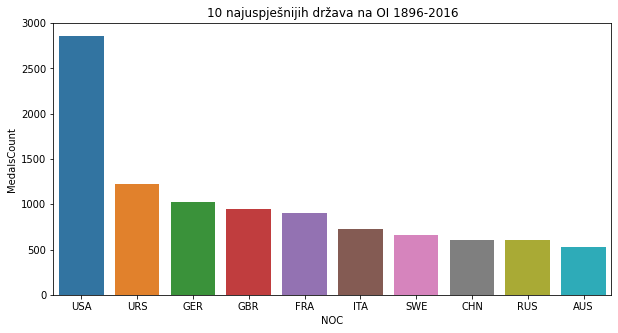

In [ ]:
medalNOC_top10 = medalData_.NOC.value_counts()[:10]
df_medalNOC_top10 = pd.DataFrame({"NOC": medalNOC_top10.index, "MedalsCount": medalNOC_top10.values})

plt.figure(figsize=(10,5))
sns.barplot(data = df_medalNOC_top10, x = "NOC", y = "MedalsCount")
plt.title("10 najuspješnijih država na OI 1896-2016")
plt.show()

In [ ]:
medal_NOC_top1 = medalData_.NOC.value_counts().index[0]
medal_NOC_top1_count = medalData_.NOC.value_counts()[0]
print(f"Država s najviše osvojenih medalja na olimpijskim igrama od 1896 do 2016 je {medal_NOC_top1} sa osvojenih {medal_NOC_top1_count} medalja.")

Država s najviše osvojenih medalja na olimpijskim igrama od 1896 do 2016 je USA sa osvojenih 2859 medalja.


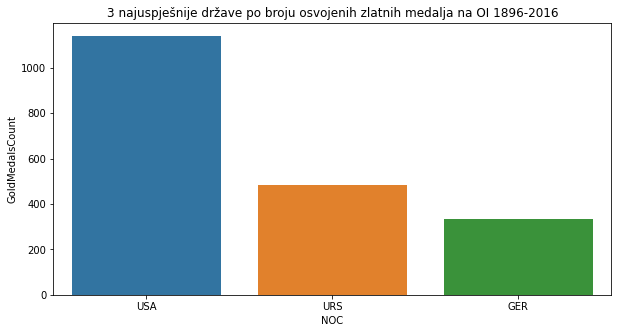

In [ ]:
goldMedalData = medalData_[medalData_.Medal == "Gold"]
goldMedalNOC_top3 = goldMedalData.NOC.value_counts()[:3]
df_goldMedalNOC_top3 = pd.DataFrame({"NOC": goldMedalNOC_top3.index, "GoldMedalsCount": goldMedalNOC_top3.values})

plt.figure(figsize=(10,5))
sns.barplot(data = df_goldMedalNOC_top3, x = "NOC", y = "GoldMedalsCount")
plt.title("3 najuspješnije države po broju osvojenih zlatnih medalja na OI 1896-2016")
plt.show()

Analogno prethodnoj analizi i država s najviše osvojenih zlatnih medalja je USA.

In [ ]:
summer_data = data[data.Season == "Summer"]
winter_data = data[data.Season == "Winter"]

Podatke smo podijelili s obzirom na sezonu održavanja OI zbog ljepšeg i jasnijeg vizualnog prikaza rezultata.

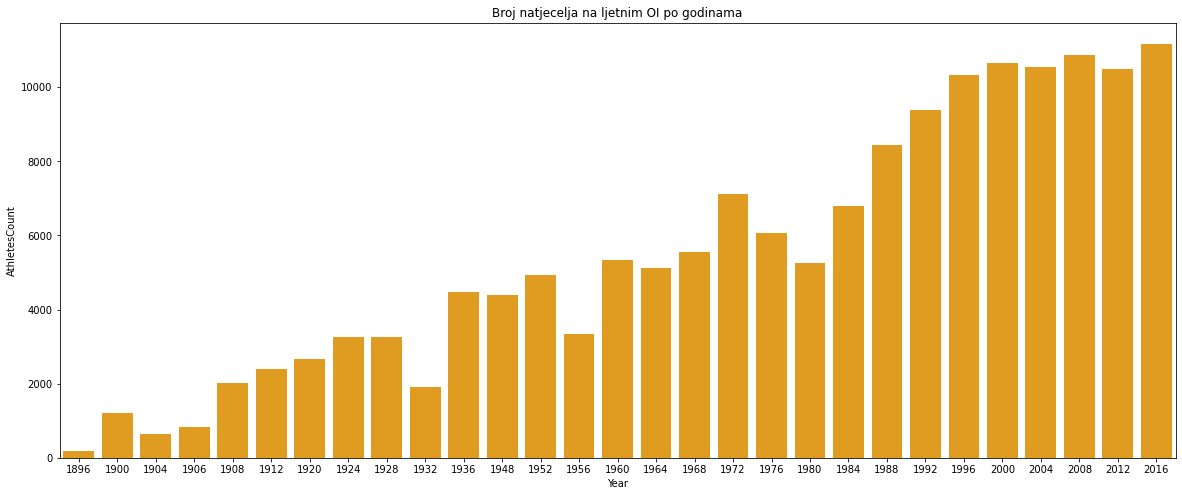

In [ ]:
summer_yearly_data = summer_data.drop_duplicates(['Name', 'Year']).Year.value_counts()
summer_yearly_data = summer_yearly_data.reset_index().sort_values('index')
summer_yearly_data.rename(columns={'index': 'Year', 'Year': 'AthletesCount'}, inplace = True)
x = summer_yearly_data.Year
y = summer_yearly_data.AthletesCount

plt.figure(figsize=(20,8))
sns.barplot(data = summer_yearly_data, x = x, y = y, color="orange")
plt.title("Broj natjecelja na ljetnim OI po godinama")
plt.show()

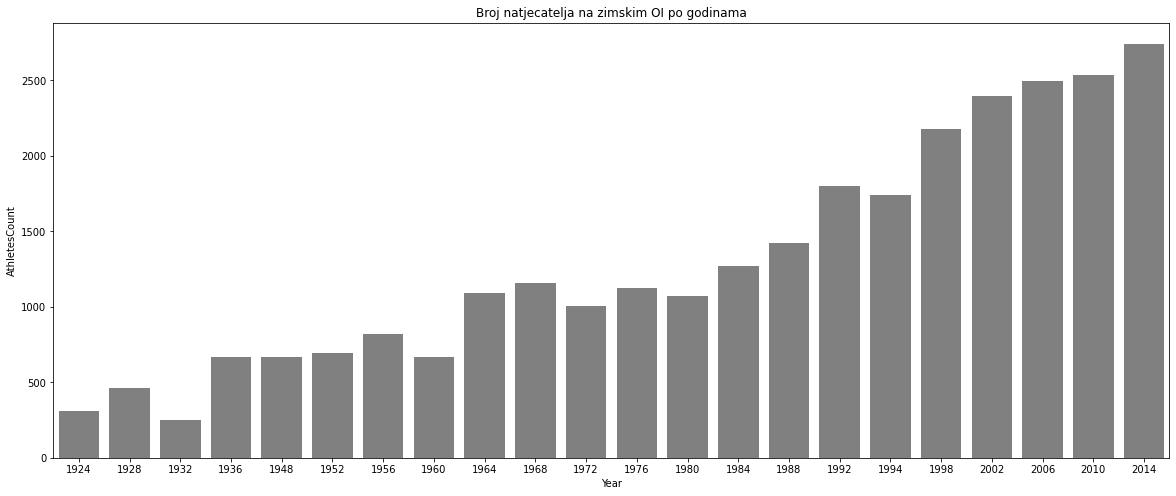

In [ ]:
winter_yearly_data = winter_data.drop_duplicates(['Name', 'Year']).Year.value_counts()
winter_yearly_data = winter_yearly_data.reset_index().sort_values('index')
winter_yearly_data.rename(columns={'index': 'Year', 'Year': 'AthletesCount'}, inplace = True)
x2 = winter_yearly_data.Year
y2 = winter_yearly_data.AthletesCount

plt.figure(figsize=(20,8))
sns.barplot(data = winter_yearly_data, x = x2, y = y2, color="gray")
plt.title("Broj natjecatelja na zimskim OI po godinama")
plt.show()

## Linearna regresija

U sljedećem primjerima uz pomoć modela linearne regresije predviđen je broj natjecatelja na budućim ljetnim olimpijskim igrama i broj osvojenih medalja SAD-a na budućim zimskim olimpijskim igrama.

#### Predviđanje broja natjecatelja na ljetnim OI

In [ ]:
from sklearn import linear_model

In [ ]:
model_S = linear_model.LinearRegression()

In [ ]:
summer_yearly_data.head()

,Year,AthletesCount
28,1896,176
25,1900,1220
27,1904,650
26,1906,841
23,1908,2024


Podjela podataka za treniranje i testiranje:

In [ ]:
from sklearn.model_selection import train_test_split

X_S = np.array(summer_yearly_data.Year).reshape(-1, 1)
y_S = np.array(summer_yearly_data.AthletesCount).reshape(-1, 1)

X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.3, random_state=42)

30% ukupnih podataka je odvojeno za testiranje. To je jedan od standardnih postotaka koji se uzima za odvajanje podataka za testiranje. Postavljanjem parametra "random_state" na 42 dobivamo iste skupove za treniranje i testiranje u različitim izvedbama.

In [ ]:
model_S.fit(X_train_S, y_train_S)

LinearRegression()

In [ ]:
print(f"Intercept: {model_S.intercept_}")
print(f"Koeficijent: {model_S.coef_}") 

Intercept: [-161152.62604002]
Koeficijent: [[85.15669689]]


Parametar "intercept" predstavlja predviđenu srednju vrijednost Y kada je X = 0. Pozitivan koeficijent nam govori kako nezavisna varijabla raste, srednja vrijednost zavisne varijable također ima tendenciju povećanja.

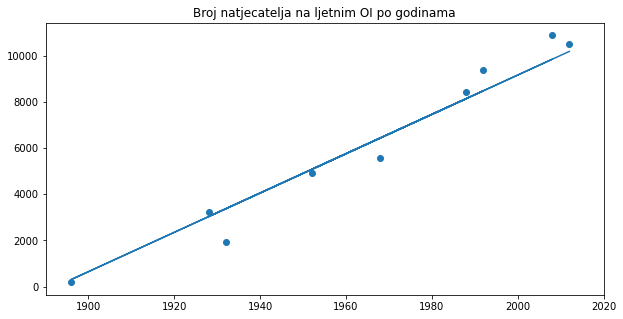

In [ ]:
y_pred_S = model_S.predict(X_test_S)

plt.figure(figsize=(10,5))
plt.scatter(X_test_S,y_test_S)
plt.plot(X_test_S,y_pred_S)
plt.xlim(1890, 2020)
plt.title("Broj natjecatelja na ljetnim OI po godinama")
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE test: {:.4f}'.format(metrics.mean_absolute_error(y_test_S, y_pred_S)))
print('MSE test: {:.4f}'.format(metrics.mean_squared_error(y_test_S, y_pred_S)))
print('R squared: {:.4f}'.format(metrics.r2_score(y_test_S, y_pred_S)))

MAE test: 597.8919
MSE test: 560490.1674
R squared: 0.9583


Također, model smo koristili za predviđanje broja natjecatelja na ljetnim OI u budućih 20 godina. 

In [ ]:
future_years_S = [[2020], [2024], [2028], [2032], [2036], [2040]]
future_years_S = np.array(future_years_S).reshape(-1, 1)

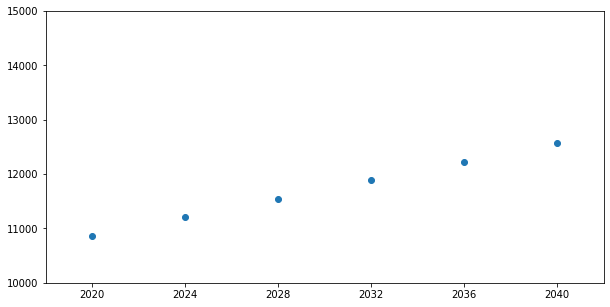

In [ ]:
y_pred_future_S = model_S.predict(future_years_S)

plt.figure(figsize=(10,5))
plt.scatter(future_years_S, y_pred_future_S)
plt.xlim(2018, 2042)
plt.ylim(10000, 15000)
plt.xticks(future_years_S)
plt.show()

Budući da su se ljetne OI 2020 već održale, imamo informaciju o broju sudionika. U sljedećem dijelu koda ćemo usporediti stvarnu vrijednost sa predviđenom. 

In [ ]:
y_2020_S = [11420]
y_2020_S_pred = y_pred_future_S[0]

In [ ]:
print(f'Broj sudionika na ljetnim OI 2020: {y_2020_S[0]}')
print(f'Broj predviđenih sudionika na ljetnim OI 2020: {y_2020_S_pred[0].round(0)}')
print(f'MAE: {metrics.mean_absolute_error(y_2020_S, y_2020_S_pred).round(0)}')

Broj sudionika na ljetnim OI 2020: 11420
Broj predviđenih sudionika na ljetnim OI 2020: 10864.0
MAE: 556.0


#### Predviđanje broja osvojenih medalja SAD-a na zimskim OI

In [ ]:
medalData_USA_winter = medalData_[(medalData_.NOC == 'USA') & (medalData_.Season == "Winter")]
medalData_USA_winter.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
278,Jeremy Abbott,M,28.0,175.0,70.0,United States,USA,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze
672,Clarence John Abel,M,23.0,185.0,102.0,United States,USA,1924,Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
2138,"Benjamin Alexandro ""Ben"" Agosto",M,24.0,178.0,75.0,United States-1,USA,2006,Winter,Torino,Figure Skating,Figure Skating Mixed Ice Dancing,Silver
2363,Kevin Joseph Ahearn,M,23.0,175.0,73.0,United States,USA,1972,Winter,Sapporo,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
4156,"Tenley Emma Albright (-Gardiner, -Blakely)",F,16.0,NaN,NaN,United States,USA,1952,Winter,Oslo,Figure Skating,Figure Skating Women's Singles,Silver


U gornjem dijelu koda smo filtrirali skup podataka s osvojenim medaljama kako bi dobili natjecatelje koji su nastupali za SAD na zimskim olimpijskim igrama.

In [ ]:
yearly_data_USA = medalData_USA_winter.Year.value_counts().reset_index().sort_values('index')
yearly_data_USA.rename(columns={'index': 'Year', 'Year': 'MedalsCount'}, inplace = True)

In [ ]:
yearly_data_USA.head()

,Year,MedalsCount
20,1924,4
18,1928,6
6,1932,13
21,1936,4
13,1948,8


In [ ]:
model_USA = linear_model.LinearRegression()

In [ ]:
X_USA = np.array(yearly_data_USA.Year).reshape(-1, 1)
y_USA = np.array(yearly_data_USA.MedalsCount).reshape(-1, 1)

In [ ]:
model_USA.fit(X_USA, y_USA)

LinearRegression()

Nakon evaluiranja modela predvidjet ćemo broj osvojenih medalja SAD-a na zimskim OI 2022. Kako su se te igre već održale, imamo podatak o broju medalja.

In [ ]:
y_USAmedals = [25]
y_USAmedals_pred = model_USA.predict([[2022]])

In [74]:
print(f'Broj sudionika na zimskim OI 2022: {y_USAmedals[0]}')
print(f'Broj predviđenih sudionika na zimskim OI 2022: {y_USAmedals_pred[0][0].round(0)}')
print(f'MAE: {metrics.mean_absolute_error(y_USAmedals, y_USAmedals_pred).round(0)}')

Broj sudionika na zimskim OI 2022: 25
Broj predviđenih sudionika na zimskim OI 2022: 26.0
MAE: 1.0
